In [2]:
#Import different libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import pickle


In [4]:
#Load the model
model = load_model('models/cnn_model.h5')

In [5]:
#Import paths
BASE_PATH = "../"
NEW_DATA_TRAIN = os.path.join(BASE_PATH, "new_data/train")

In [6]:
#Define parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 30

In [7]:
#Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    NEW_DATA_TRAIN,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
    classes=['covid', 'lung_opacity', 'normal', 'pneumonia', 'trash']
)


Found 16 images belonging to 4 classes.


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#Set up callbacks
callbacks = [
    EarlyStopping(monitor='loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='models/cnn_model.keras', save_best_only=True)
]


In [12]:
#Retrain the model with new data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.0081


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.0030


Training accuracy: 100.00%


ValueError: x and y must have same first dimension, but have shapes (30,) and (14,)

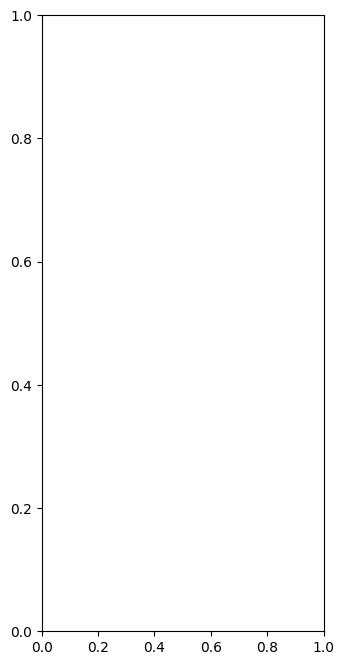

In [11]:
#Evaluate the model
loss, accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Training accuracy: {accuracy * 100:.2f}%")

#Save the updated model
model.save('models/cnn_model_incremental.h5')

#Convert model to pickle
with open('models/cnn_model_incremental.pkl', 'wb') as file:
    pickle.dump(model, file)
